Exercicio 5


Epoch 1/20
1715/1715 [==============================] - 9s 5ms/step - loss: 0.2364 - accuracy: 0.9320 - val_loss: 0.1621 - val_accuracy: 0.9558
Epoch 2/20
1715/1715 [==============================] - 11s 6ms/step - loss: 0.1015 - accuracy: 0.9685 - val_loss: 0.1461 - val_accuracy: 0.9645
Epoch 3/20
1715/1715 [==============================] - 8s 5ms/step - loss: 0.0746 - accuracy: 0.9761 - val_loss: 0.1417 - val_accuracy: 0.9642
Epoch 4/20
1715/1715 [==============================] - 10s 6ms/step - loss: 0.0547 - accuracy: 0.9825 - val_loss: 0.1530 - val_accuracy: 0.9672
Epoch 5/20
1715/1715 [==============================] - 11s 6ms/step - loss: 0.0519 - accuracy: 0.9837 - val_loss: 0.1453 - val_accuracy: 0.9703
Epoch 6/20
1715/1715 [==============================] - 8s 4ms/step - loss: 0.0424 - accuracy: 0.9875 - val_loss: 0.1859 - val_accuracy: 0.9708
Epoch 7/20
1715/1715 [==============================] - 10s 6ms/step - loss: 0.0443 - accuracy: 0.9876 - val_loss: 0.1894 - val_accur

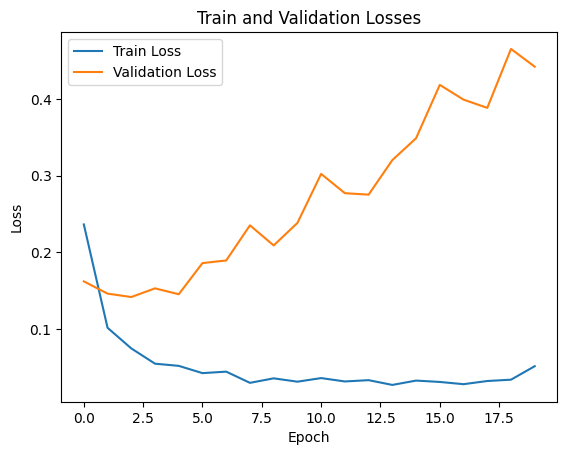

Test Loss: 0.3673, Test Accuracy: 0.9734
313/313 [==============================] - 1s 2ms/step


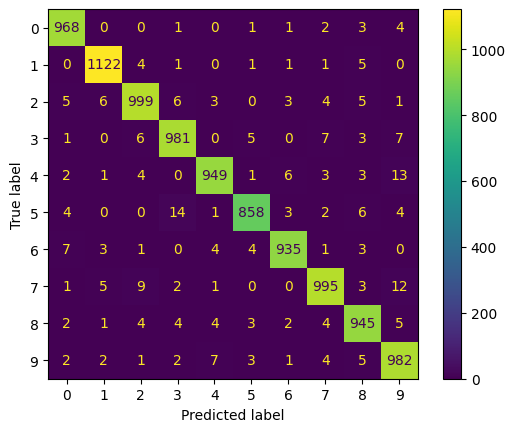

In [12]:
import tensorflow as tf
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

CREATE_CLASS = True  # Create class from scratch; otherwise use Sequential to create the class
IRIS = False  # iris or mnist
SHOW = False  # returns picture of digit for mnist


#Carregar os conjunto de dados MNIST

if not IRIS:
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
    X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
    input_size = X_train.shape[1]
    output_size = 10
else:
    examples = load_iris()
    X = examples.data
    y = examples.target
    input_size = X.shape[1]
    output_size = len(examples.target_names)

#Divisão dos dados em conjuntos de treino e teste

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Standartização das carateristicas

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#Ajustamento do modelo

hidden_size = 219
batch_size = 28
num_epochs = 20
learning_rate = 0.001
dropout_p=0.25

#Criação do modelo

if CREATE_CLASS:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)),
        tf.keras.layers.Dense(hidden_size, activation='relu'),
        tf.keras.layers.Dense(output_size, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
    model.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
    model.add(tf.keras.layers.Dense(output_size, activation='softmax'))

#Compilação do modelo

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Treinamento do modelo

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
                    validation_data=(X_val, y_val), verbose=1)

#Visualização da perda de treinamento e validação

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Losses')
plt.legend()
plt.show()

#Avaliação do modelo

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

#Matriz

y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()
